# Produce the figures for the numerical results

This IPython notebook produces the error x distance-size ratio figures for the section "Evaluation of the accuracy" of the article.

The data was calculated by the `tesseroid_vs_spherical_shell.ipynb` notebook and saved to CSV files in the `data` directory of the main repository.

## Load the required libraries and set the plot defaults

We'll use the pandas library to load and manipulate the data. Plots will be made with matplotlib.

In [1]:
%matplotlib inline
from __future__ import division
from IPython.display  import set_matplotlib_formats
set_matplotlib_formats('svg')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['axes.labelsize'] = 9.0  # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 9.0  # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 9.0  # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 9.0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.usetex'] = True  # use latex for all text handling
plt.rcParams['text.color'] = '3a3a3a'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = '3a3a3a'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2

## Load the spherical shell data

And load the computed shell effect per height so that we can calculate the relative difference.

In [3]:
shell = pd.read_csv('../data/shell-per-height.csv', index_col=0)

In [4]:
shell

,gx,gxx,gxy,gxz,gy,gyy,gyz,gz,gzz,pot,height
0,0,-0.350758,0,0,0,-0.350758,0,223.788630,0.701517,14278.021191,2000
1,0,-0.349442,0,0,0,-0.349442,0,223.228471,0.698884,14260.140521,10000
2,0,-0.342959,0,0,0,-0.342959,0,220.458972,0.685919,14171.404761,50000
3,0,-0.327439,0,0,0,-0.327439,0,213.756587,0.654878,13954.322847,150000
4,0,-0.311429,0,0,0,-0.311429,0,206.730999,0.622858,13723.086957,260000


## Plot the error vs distance-size ratio for the 4 experiments

Load the computed differences between the shell and tesseroid effects for each experiment.
We'll use the `groupby` method of the *pandas* `DataFrame` to compute the maximum absolute difference per distance-size ratio and keep that.

In [5]:
def load_max_diff(fname):
    data = pd.read_csv(fname)
    return data.groupby(['size', 'ratio']).max()

In [6]:
pole = load_max_diff('../data/difference-size-1-height-2000-pole.csv')
equator = load_max_diff('../data/difference-size-1-height-2000-equator.csv')
goce = load_max_diff('../data/difference-size-1-height-260000-pole.csv')
big = load_max_diff('../data/difference-size-30-height-2000-pole.csv')

This is what the data looks like after taking the maximum difference per ratio.

In [7]:
pole.head()

point          gx         gxx        gxy          gxz        gy  \
size ratio                                                                    
1    0.0       99  769.086112  854.704698  26.822236  5372.013197  0.876313   
     0.5      199   11.215857   85.182630  21.765414    45.271905  1.271564   
     1.0      299    0.463330   19.514930   2.203664    13.430373  0.236333   
     1.5      399    0.070450    1.144707   0.209287     0.557937  0.031353   
     2.0      499    0.022737    0.149761   0.024231     0.120548  0.005499   

                   gyy        gyz          gz         gzz        pot  
size ratio                                                            
1    0.0    311.835644  27.800405  686.281514  782.758707  33.533012  
     0.5     64.388814  13.539341   99.543785  128.777627   6.633058  
     1.0     12.838965   8.384167    1.027770   32.012723   0.074944  
     1.5      1.392990   0.662468    0.203132    2.289414   0.023323  
     2.0      0.208828   0.123601    0.020666    0.283195   0.007042

Make a plot of the maximum relative difference as a function of the distance-size ratio used in the computations.

In [8]:
ratio = pole.index.levels[1] # Get the unique values of the distance-size ratio used

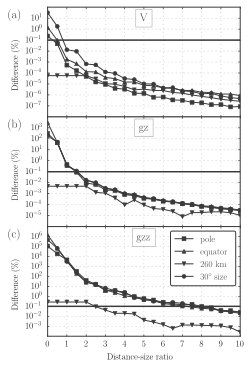

In [9]:
plotargs = dict(color='#3a3a3a', markeredgewidth=0.5, markeredgecolor='#3a3a3a')
styles = "-s -^ -v -o".split()
fig, subplots = plt.subplots(3, 1, figsize=(3.33, 5), sharex='col')
axes = subplots.ravel()
fields = ['pot', 'gz', 'gzz']
titles = [r'V', r'gz', r'gzz']
subfigure = ['(a)', '(b)', '(c)']
for ax, f, title, sub in zip(axes, fields, titles, subfigure):
    ax.text(-0.21, 0.9, sub, fontsize=12, fontdict={'weight': 'bold'},
            transform=ax.transAxes)
    ax.text(0.5, 0.9, title, fontsize=11, 
            horizontalalignment='center', verticalalignment='center',
            bbox={'facecolor': 'w', 
                  'edgecolor': '#9b9b9b',
                  'linewidth': 0.5, 'pad': 8}, 
            transform=ax.transAxes)
    shell_low = np.abs(shell[shell.height == 2000][f].values)
    shell_high = np.abs(shell[shell.height == 260000][f].values)
    ax.plot(ratio, 100*pole[f]/shell_low, styles[0], label='pole', 
            **plotargs)
    ax.plot(ratio, 100*equator[f]/shell_low, styles[1], label='equator', 
            **plotargs)
    ax.plot(ratio, 100*goce[f]/shell_high, styles[2], label='260 km', 
            **plotargs)
    ax.plot(ratio, 100*big[f]/shell_low, styles[3], label=r'$30^\circ$ size', 
            **plotargs)
    ax.hlines(0.1, ratio.min(), ratio.max(), colors=['#3a3a3a'], linewidth=1.5)    
    ax.set_xlim(ratio.min(), ratio.max())
    ax.set_yscale('log')
    ax.set_xticks(range(11))
    ax.set_yticks(ax.get_yticks()[2:-2])
    ax.set_ylabel('Difference (\\%)')
    ax.grid(True, linewidth=0.5, color='#aeaeae')
    ax.set_axisbelow(True)
    ax.minorticks_off()
ax = axes[-1]
ax.set_xlabel('Distance-size ratio')
ax.legend(borderpad=0.5, numpoints=1, bbox_to_anchor=(1, 1), 
          fancybox=True, shadow=False, fontsize=9, )
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('../figs/distance-size-curves.eps') # Save the figure to an EPS

## Plot the error curves for gzz for various heights

Load the data for the gzz difference per height. I'll use the pre-loaded spherical shell data to calculate the relative difference.

In [10]:
gzz = pd.read_csv('../data/difference-gzz-per-height-size-1-pole.csv', index_col=0).groupby(['height', 'ratio']).max()

This is what the first few  lines of the data look like.

In [11]:
gzz.head()

gzz
height ratio            
2000   0.0    782.758707
       0.5    128.777627
       1.0     32.012723
       1.5      2.289414
       2.0      0.283195

In [12]:
heights = gzz.index.levels[0].values # Get the unique values of the computation height

In [13]:
heights

array([   2000.,   10000.,   50000.,  150000.,  260000.])

Now we'll make the difference x ratio plot with a curve for each height.

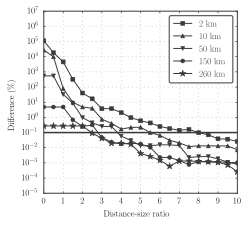

In [14]:
color = '#3a3a3a'
styles = "-s -^ -v -o -*".split()
fig = plt.figure(figsize=(3.33, 3))
ax = plt.subplot(111)
for h, sty in zip(heights, styles):
    shell_value = np.abs(shell[shell.height == h]['gzz'].values)
    diff = 100*gzz.loc[int(h)]/shell_value
    markersize = 4
    if sty[-1] == '*':
        markersize = 7
    ax.plot(ratio, diff, sty, label='{:.0f} km'.format(h/1000), color=color, 
            markeredgewidth=0.5, markeredgecolor=color, markersize=markersize)
ax.hlines(0.1, ratio.min(), ratio.max(), colors=['#3a3a3a'], linewidth=1.5)    
ax.set_xlim(ratio.min(), ratio.max())
ax.set_yscale('log')
ax.set_xticks(range(11))
ax.set_yticks(ax.get_yticks())
ax.minorticks_off()
ax.grid(True, linewidth=0.5, color='#aeaeae')
ax.set_axisbelow(True)
ax.set_ylabel('Difference (\\%)')
ax.set_xlabel('Distance-size ratio')
ax.legend(borderpad=0.5, numpoints=1, bbox_to_anchor=(1, 1), 
          fancybox=True, shadow=False, fontsize=9, )
plt.tight_layout(pad=0.25, h_pad=0, w_pad=0)
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('../figs/gzz-with-height.eps') # Save the figure to an EPS